In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import io

from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# loading data
file_path="Resources/FoodAccess2015HousingPrice_All.csv"
foodAccess_df=pd.read_csv(file_path, index_col=False)
foodAccess_df.head()

Urban  POP2010  OHU2010  NUMGQTRS  LILATracts_halfAnd10  \
0      1     2937     1314         2                     0   
1      1     1974      856        70                     0   
2      1     4865     2418        40                     0   
3      1     3703     1779        33                     0   
4      1     3517     1578       126                     0   

   LILATracts_Vehicle  LowIncomeTracts  PovertyRate  MedianFamilyIncome  \
0                   0                0          5.0              230139   
1                   0                0          4.0              181016   
2                   0                0          8.6              136250   
3                   0                0          7.2              109861   
4                   0                0         15.1              102083   

   LATracts_half  ...  TractLOWI  TractWhite  TractBlack  TractAsian  \
0              1  ...        173        2161         142         456   
1              0  ...        161        1659          33         147   
2              0  ...        781        3468         518         423   
3              0  ...        672        2628         456         278   
4              1  ...        924        1905         955         209   

   TractNHOPI  TractAIAN  TractHispanic  TractHUNV  TractSNAP  \
0           9          4            117          0          0   
1           0          4            151         57          6   
2           5         17            399        354         34   
3           6         14            332        159          9   
4           5         27            340        258         72   

   ZScore_EstMedVal  
0          2.416889  
1          1.682202  
2          1.541934  
3          1.400941  
4          0.652844  

[5 rows x 36 columns]

In [3]:
#Create DataFrame
foodAccess_2015=pd.DataFrame(foodAccess_df)

In [4]:
#copy DataFrame
new_foodAccess_df=foodAccess_2015.copy()
new_foodAccess_df.head()

Urban  POP2010  OHU2010  NUMGQTRS  LILATracts_halfAnd10  \
0      1     2937     1314         2                     0   
1      1     1974      856        70                     0   
2      1     4865     2418        40                     0   
3      1     3703     1779        33                     0   
4      1     3517     1578       126                     0   

   LILATracts_Vehicle  LowIncomeTracts  PovertyRate  MedianFamilyIncome  \
0                   0                0          5.0              230139   
1                   0                0          4.0              181016   
2                   0                0          8.6              136250   
3                   0                0          7.2              109861   
4                   0                0         15.1              102083   

   LATracts_half  ...  TractLOWI  TractWhite  TractBlack  TractAsian  \
0              1  ...        173        2161         142         456   
1              0  ...        161        1659          33         147   
2              0  ...        781        3468         518         423   
3              0  ...        672        2628         456         278   
4              1  ...        924        1905         955         209   

   TractNHOPI  TractAIAN  TractHispanic  TractHUNV  TractSNAP  \
0           9          4            117          0          0   
1           0          4            151         57          6   
2           5         17            399        354         34   
3           6         14            332        159          9   
4           5         27            340        258         72   

   ZScore_EstMedVal  
0          2.416889  
1          1.682202  
2          1.541934  
3          1.400941  
4          0.652844  

[5 rows x 36 columns]

In [5]:
new_foodAccess_df.columns

Index(['Urban', 'POP2010', 'OHU2010', 'NUMGQTRS', 'LILATracts_halfAnd10',
       'LILATracts_Vehicle', 'LowIncomeTracts', 'PovertyRate',
       'MedianFamilyIncome', 'LATracts_half', 'LATracts1', 'LATracts10',
       'LAPOP05_10', 'lawhitehalf', 'lablackhalf', 'laasianhalf',
       'laomultirhalf', 'lawhite1', 'lanhopi1', 'laaian1', 'lahisp1',
       'lahunv1', 'lahunv10', 'laasian20', 'lahunv20', 'lasnap20', 'TractLOWI',
       'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN',
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],
      dtype='object')

<IPython.core.display.Javascript object>


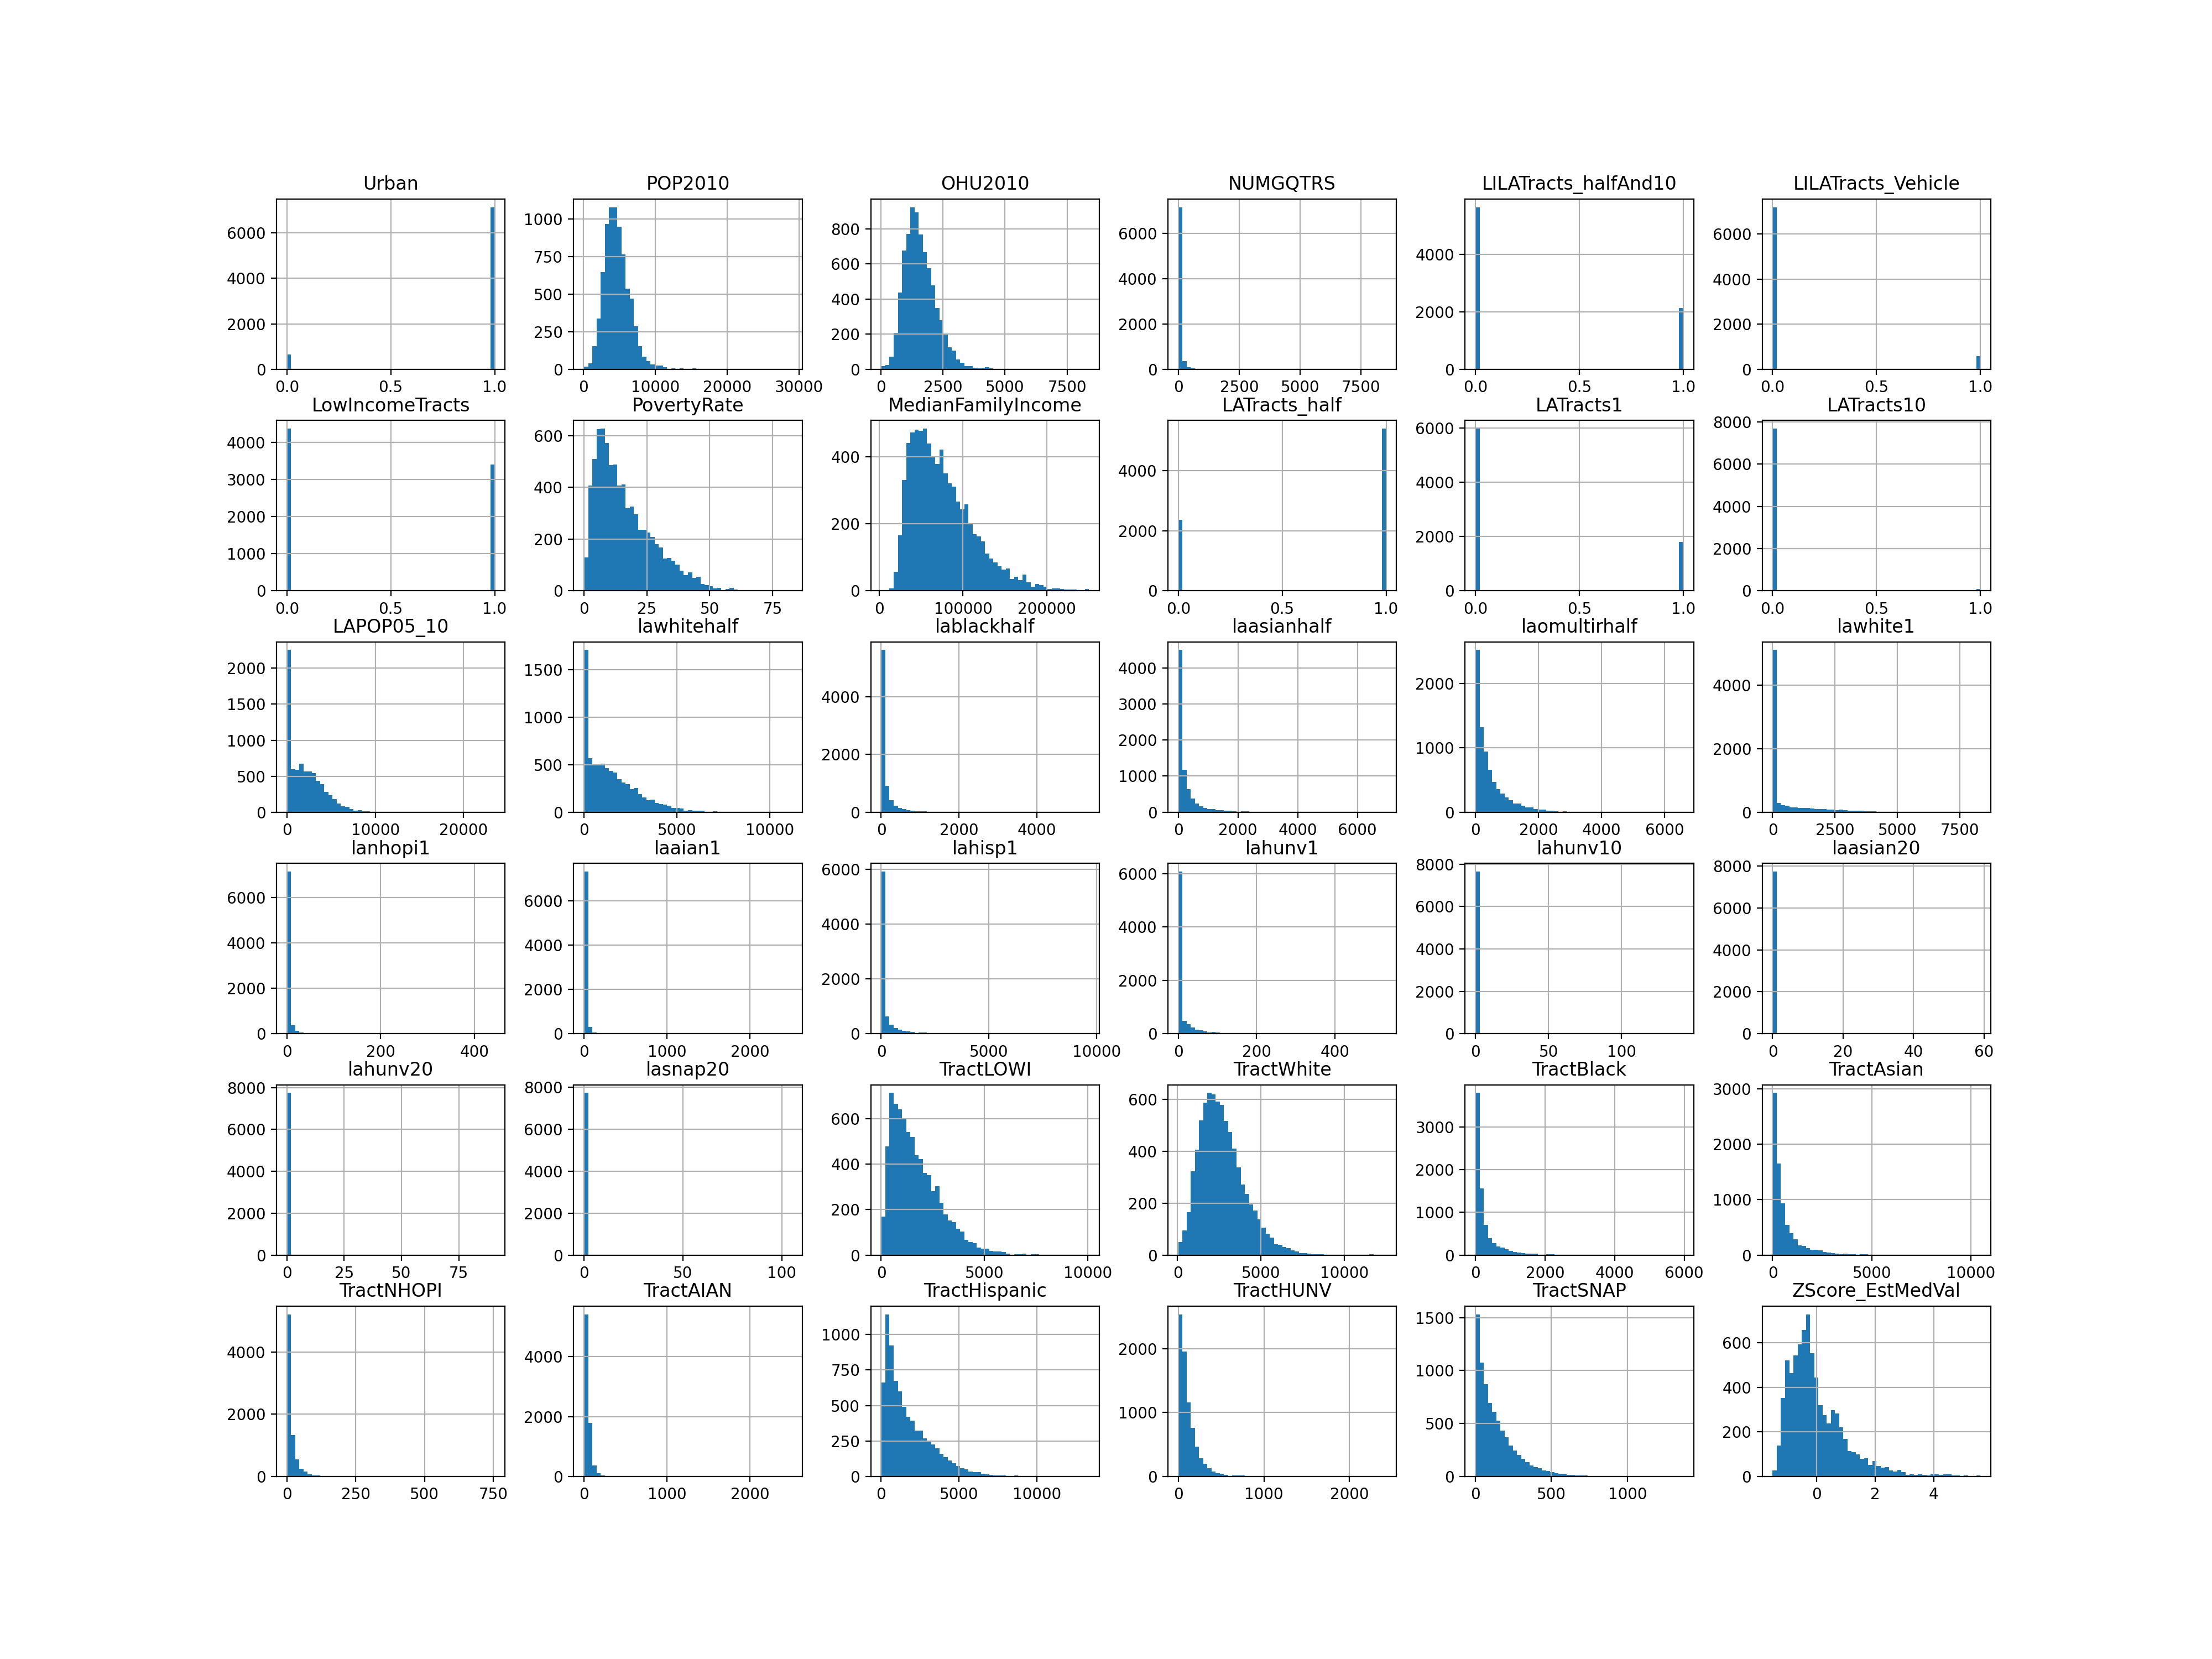

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
new_foodAccess_df.hist(bins=50, figsize=(20,15))
plt.show()


<IPython.core.display.Javascript object>


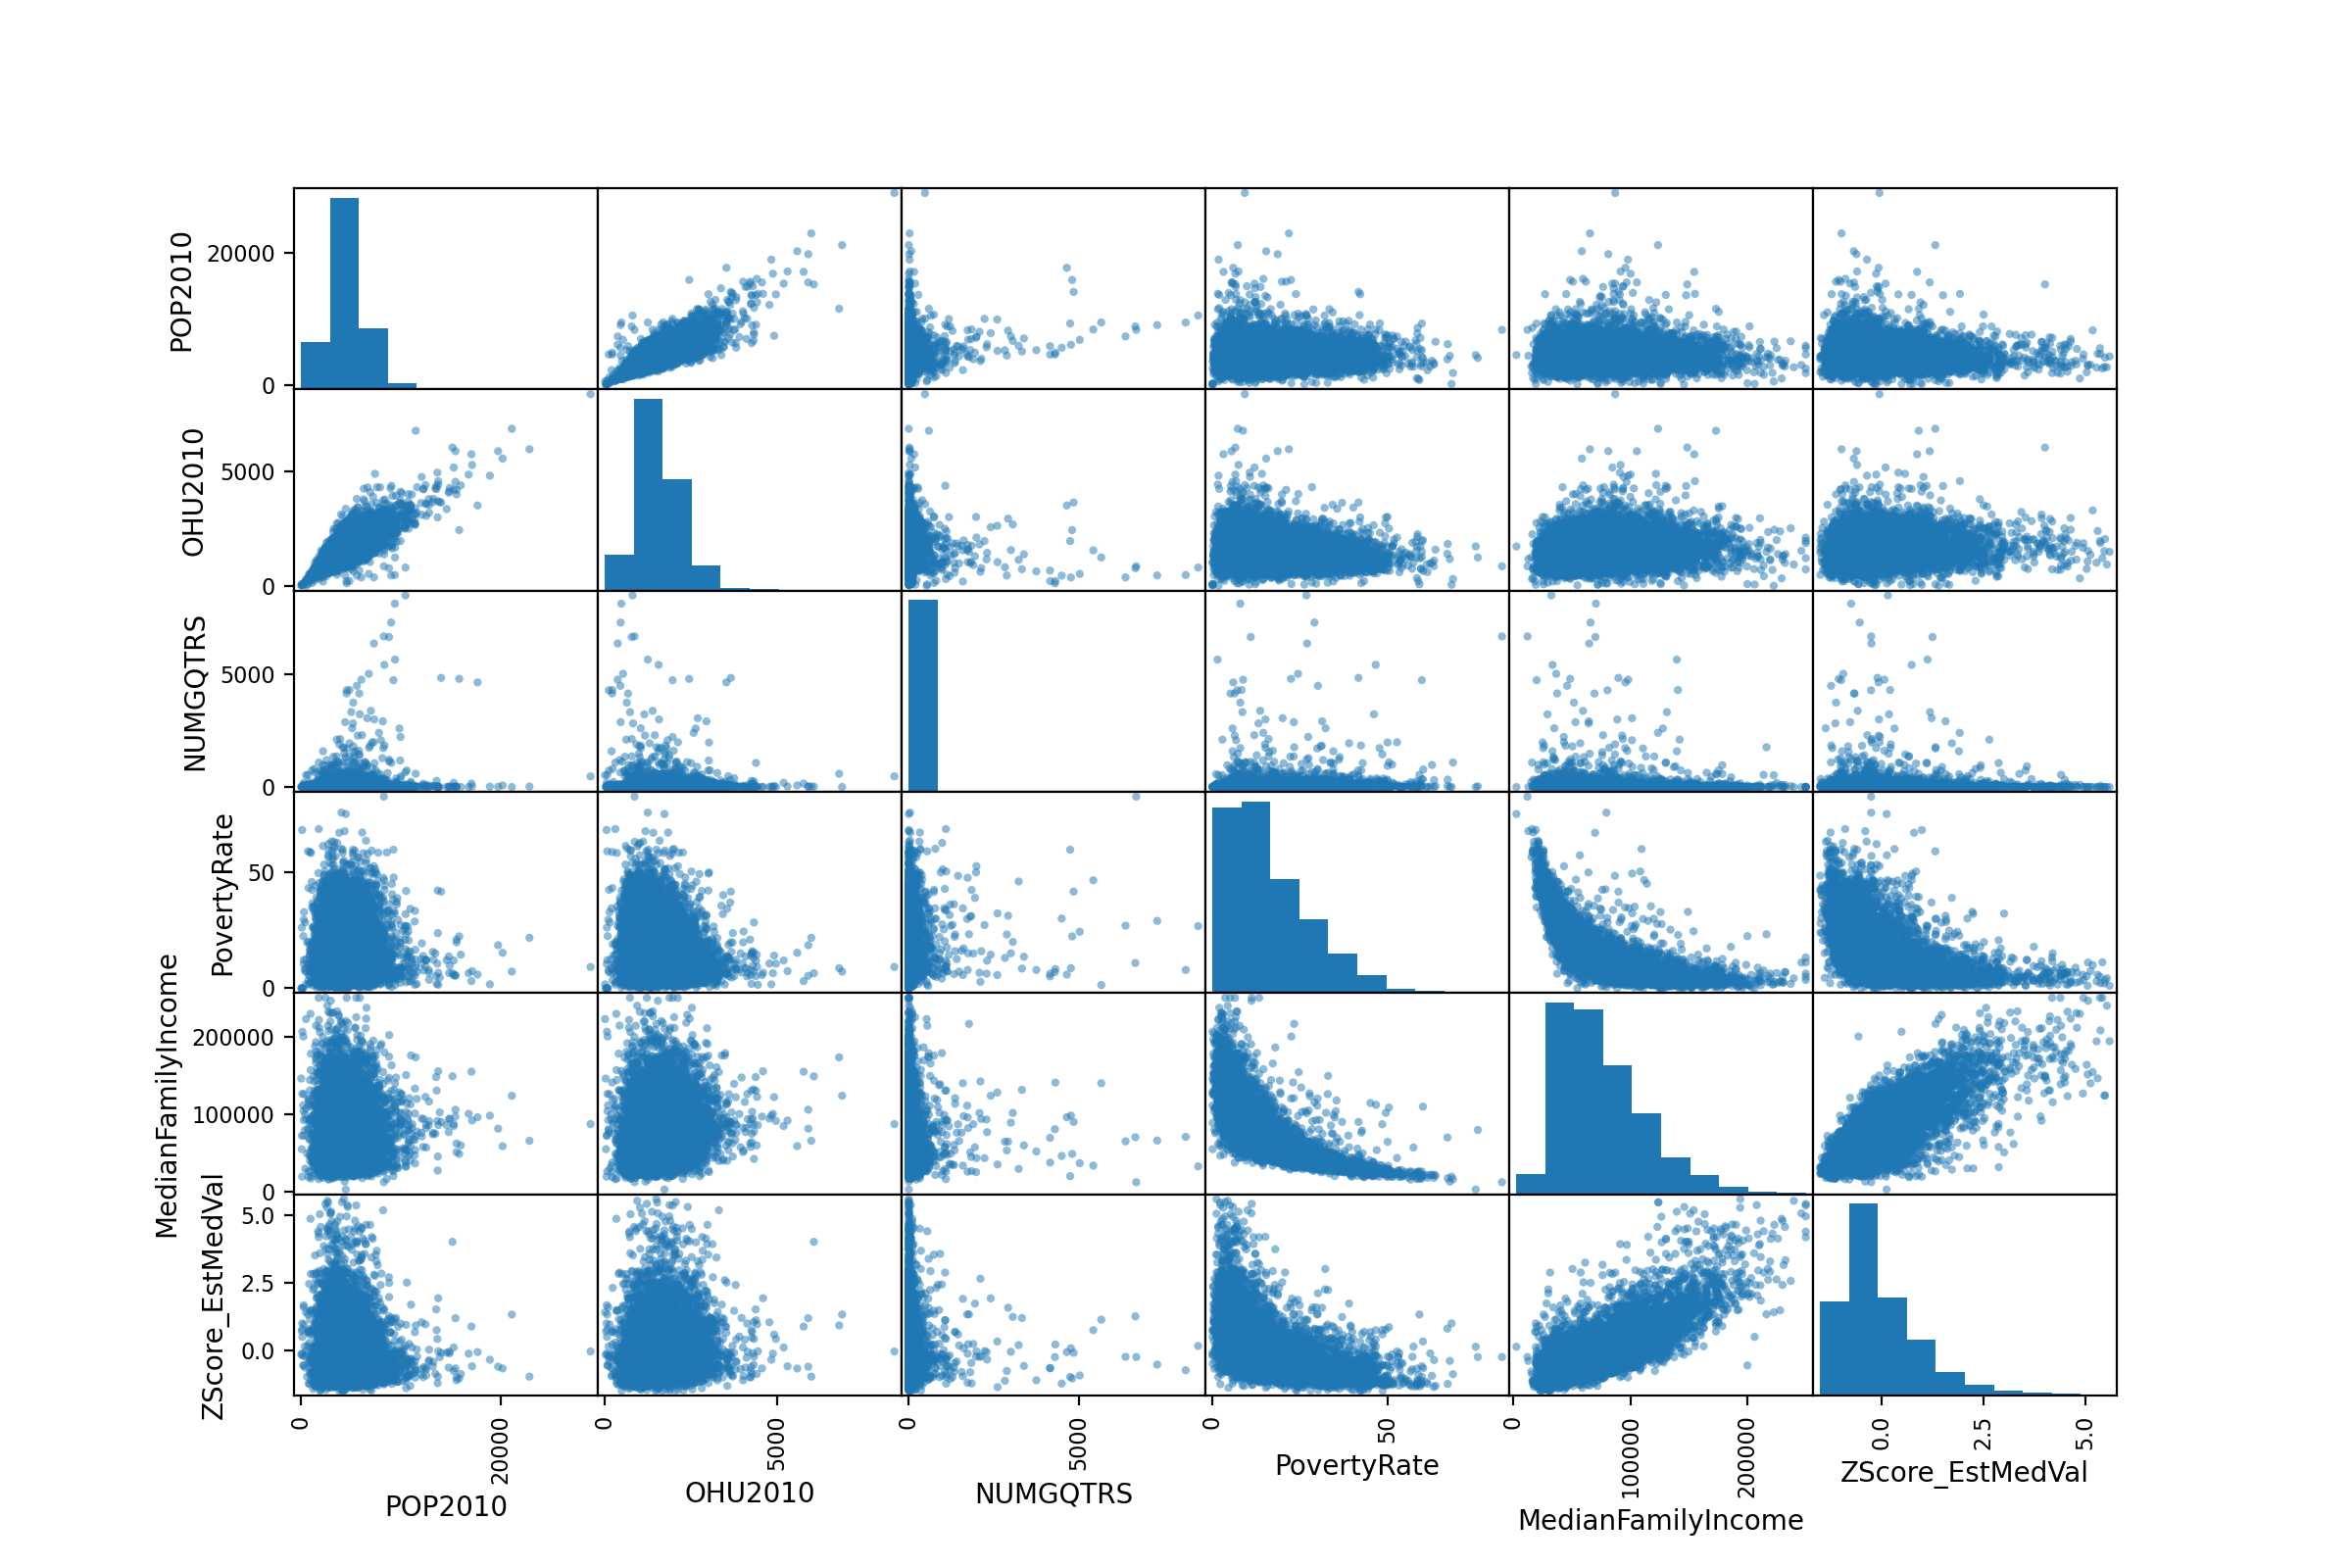

array([[<AxesSubplot:xlabel='POP2010', ylabel='POP2010'>,
        <AxesSubplot:xlabel='OHU2010', ylabel='POP2010'>,
        <AxesSubplot:xlabel='NUMGQTRS', ylabel='POP2010'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='POP2010'>,
        <AxesSubplot:xlabel='MedianFamilyIncome', ylabel='POP2010'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='POP2010'>],
       [<AxesSubplot:xlabel='POP2010', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='OHU2010', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='NUMGQTRS', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='MedianFamilyIncome', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='OHU2010'>],
       [<AxesSubplot:xlabel='POP2010', ylabel='NUMGQTRS'>,
        <AxesSubplot:xlabel='OHU2010', ylabel='NUMGQTRS'>,
        <AxesSubplot:xlabel='NUMGQTRS', ylabel='NUMGQTRS'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='NUMGQTRS'>,
        <Ax

In [7]:
from pandas.plotting import scatter_matrix
colist=new_foodAccess_df.filter(['POP2010', 'OHU2010','NUMGQTRS','PovertyRate', 'MedianFamilyIncome','ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(new_foodAccess_df[attributes], figsize=(12, 8))

<IPython.core.display.Javascript object>


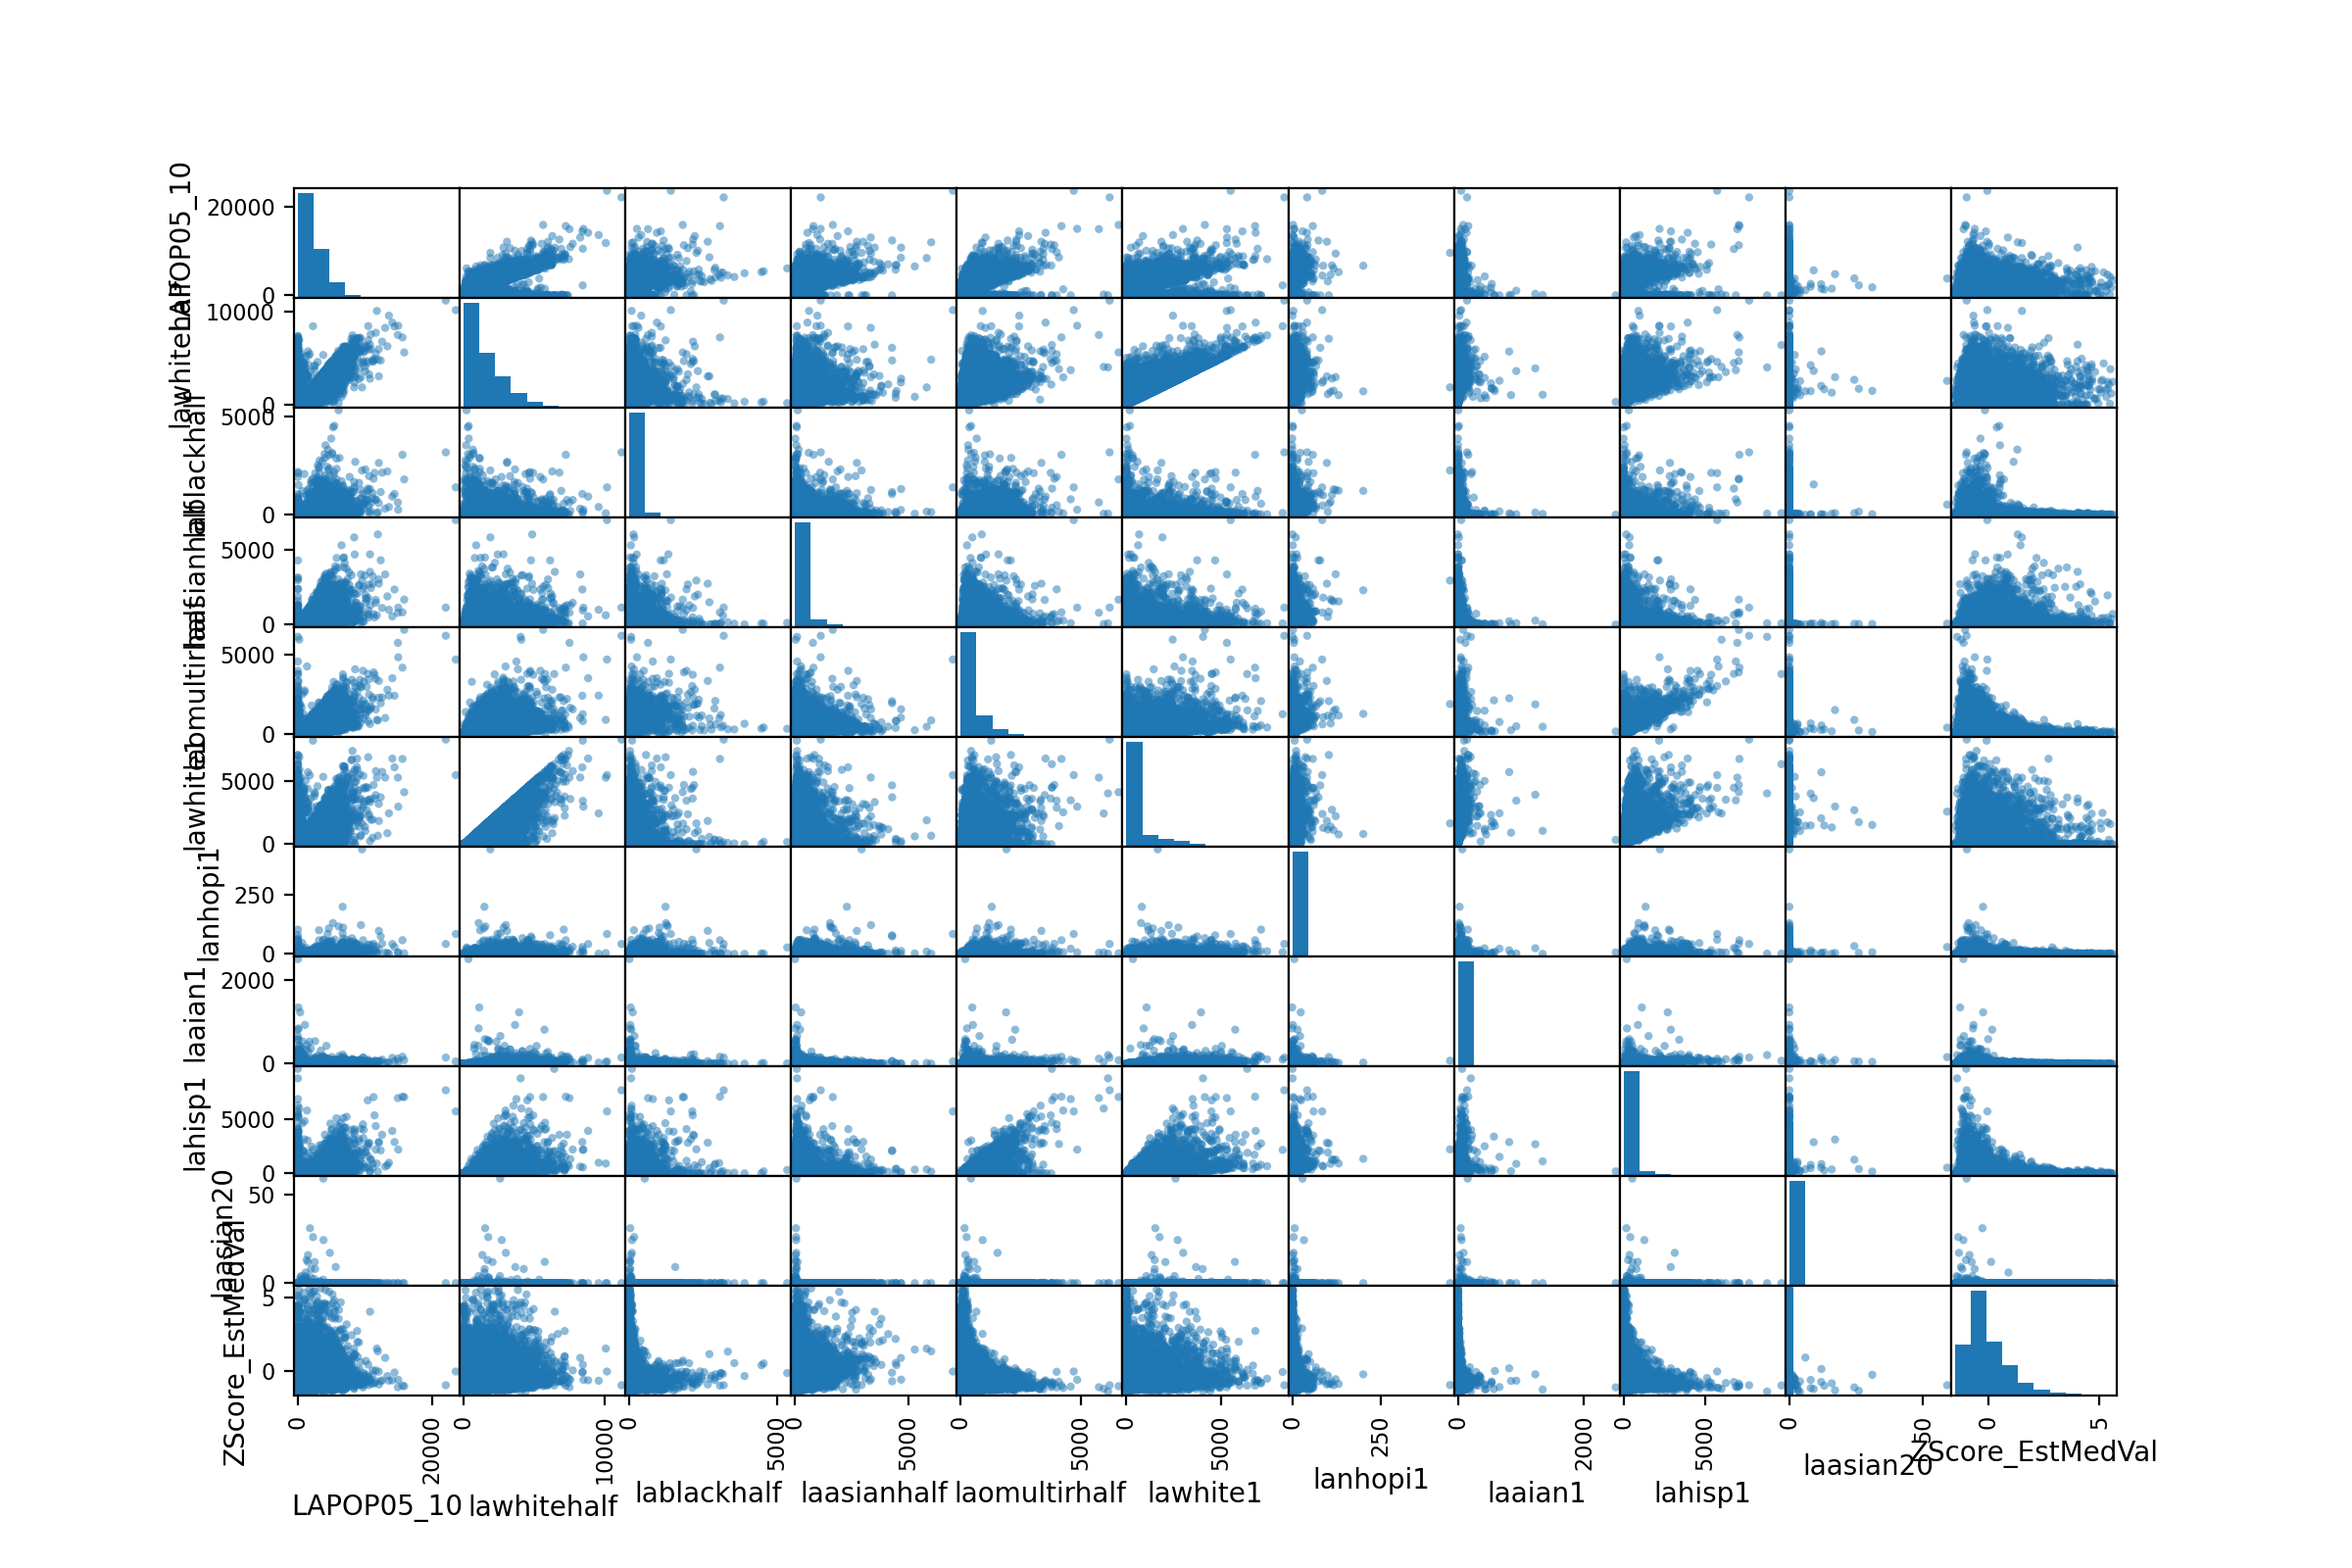

array([[<AxesSubplot:xlabel='LAPOP05_10', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='lawhitehalf', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='lablackhalf', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='laasianhalf', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='laomultirhalf', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='lawhite1', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='lanhopi1', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='laaian1', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='lahisp1', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='laasian20', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='LAPOP05_10'>],
       [<AxesSubplot:xlabel='LAPOP05_10', ylabel='lawhitehalf'>,
        <AxesSubplot:xlabel='lawhitehalf', ylabel='lawhitehalf'>,
        <AxesSubplot:xlabel='lablackhalf', ylabel='lawhitehalf'>,
        <AxesSubplot:xlabel='laasianhalf', ylabel='lawhitehalf'>,
        <AxesSubplot:xlabel='la

In [8]:
colist=new_foodAccess_df.filter(['LAPOP05_10', 'lawhitehalf', 'lablackhalf', 'laasianhalf', 'laomultirhalf', 'lawhite1',  'lanhopi1', 
        'laaian1',  'lahisp1', 'laasian20',  'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(new_foodAccess_df[attributes], figsize=(12, 8))

<IPython.core.display.Javascript object>


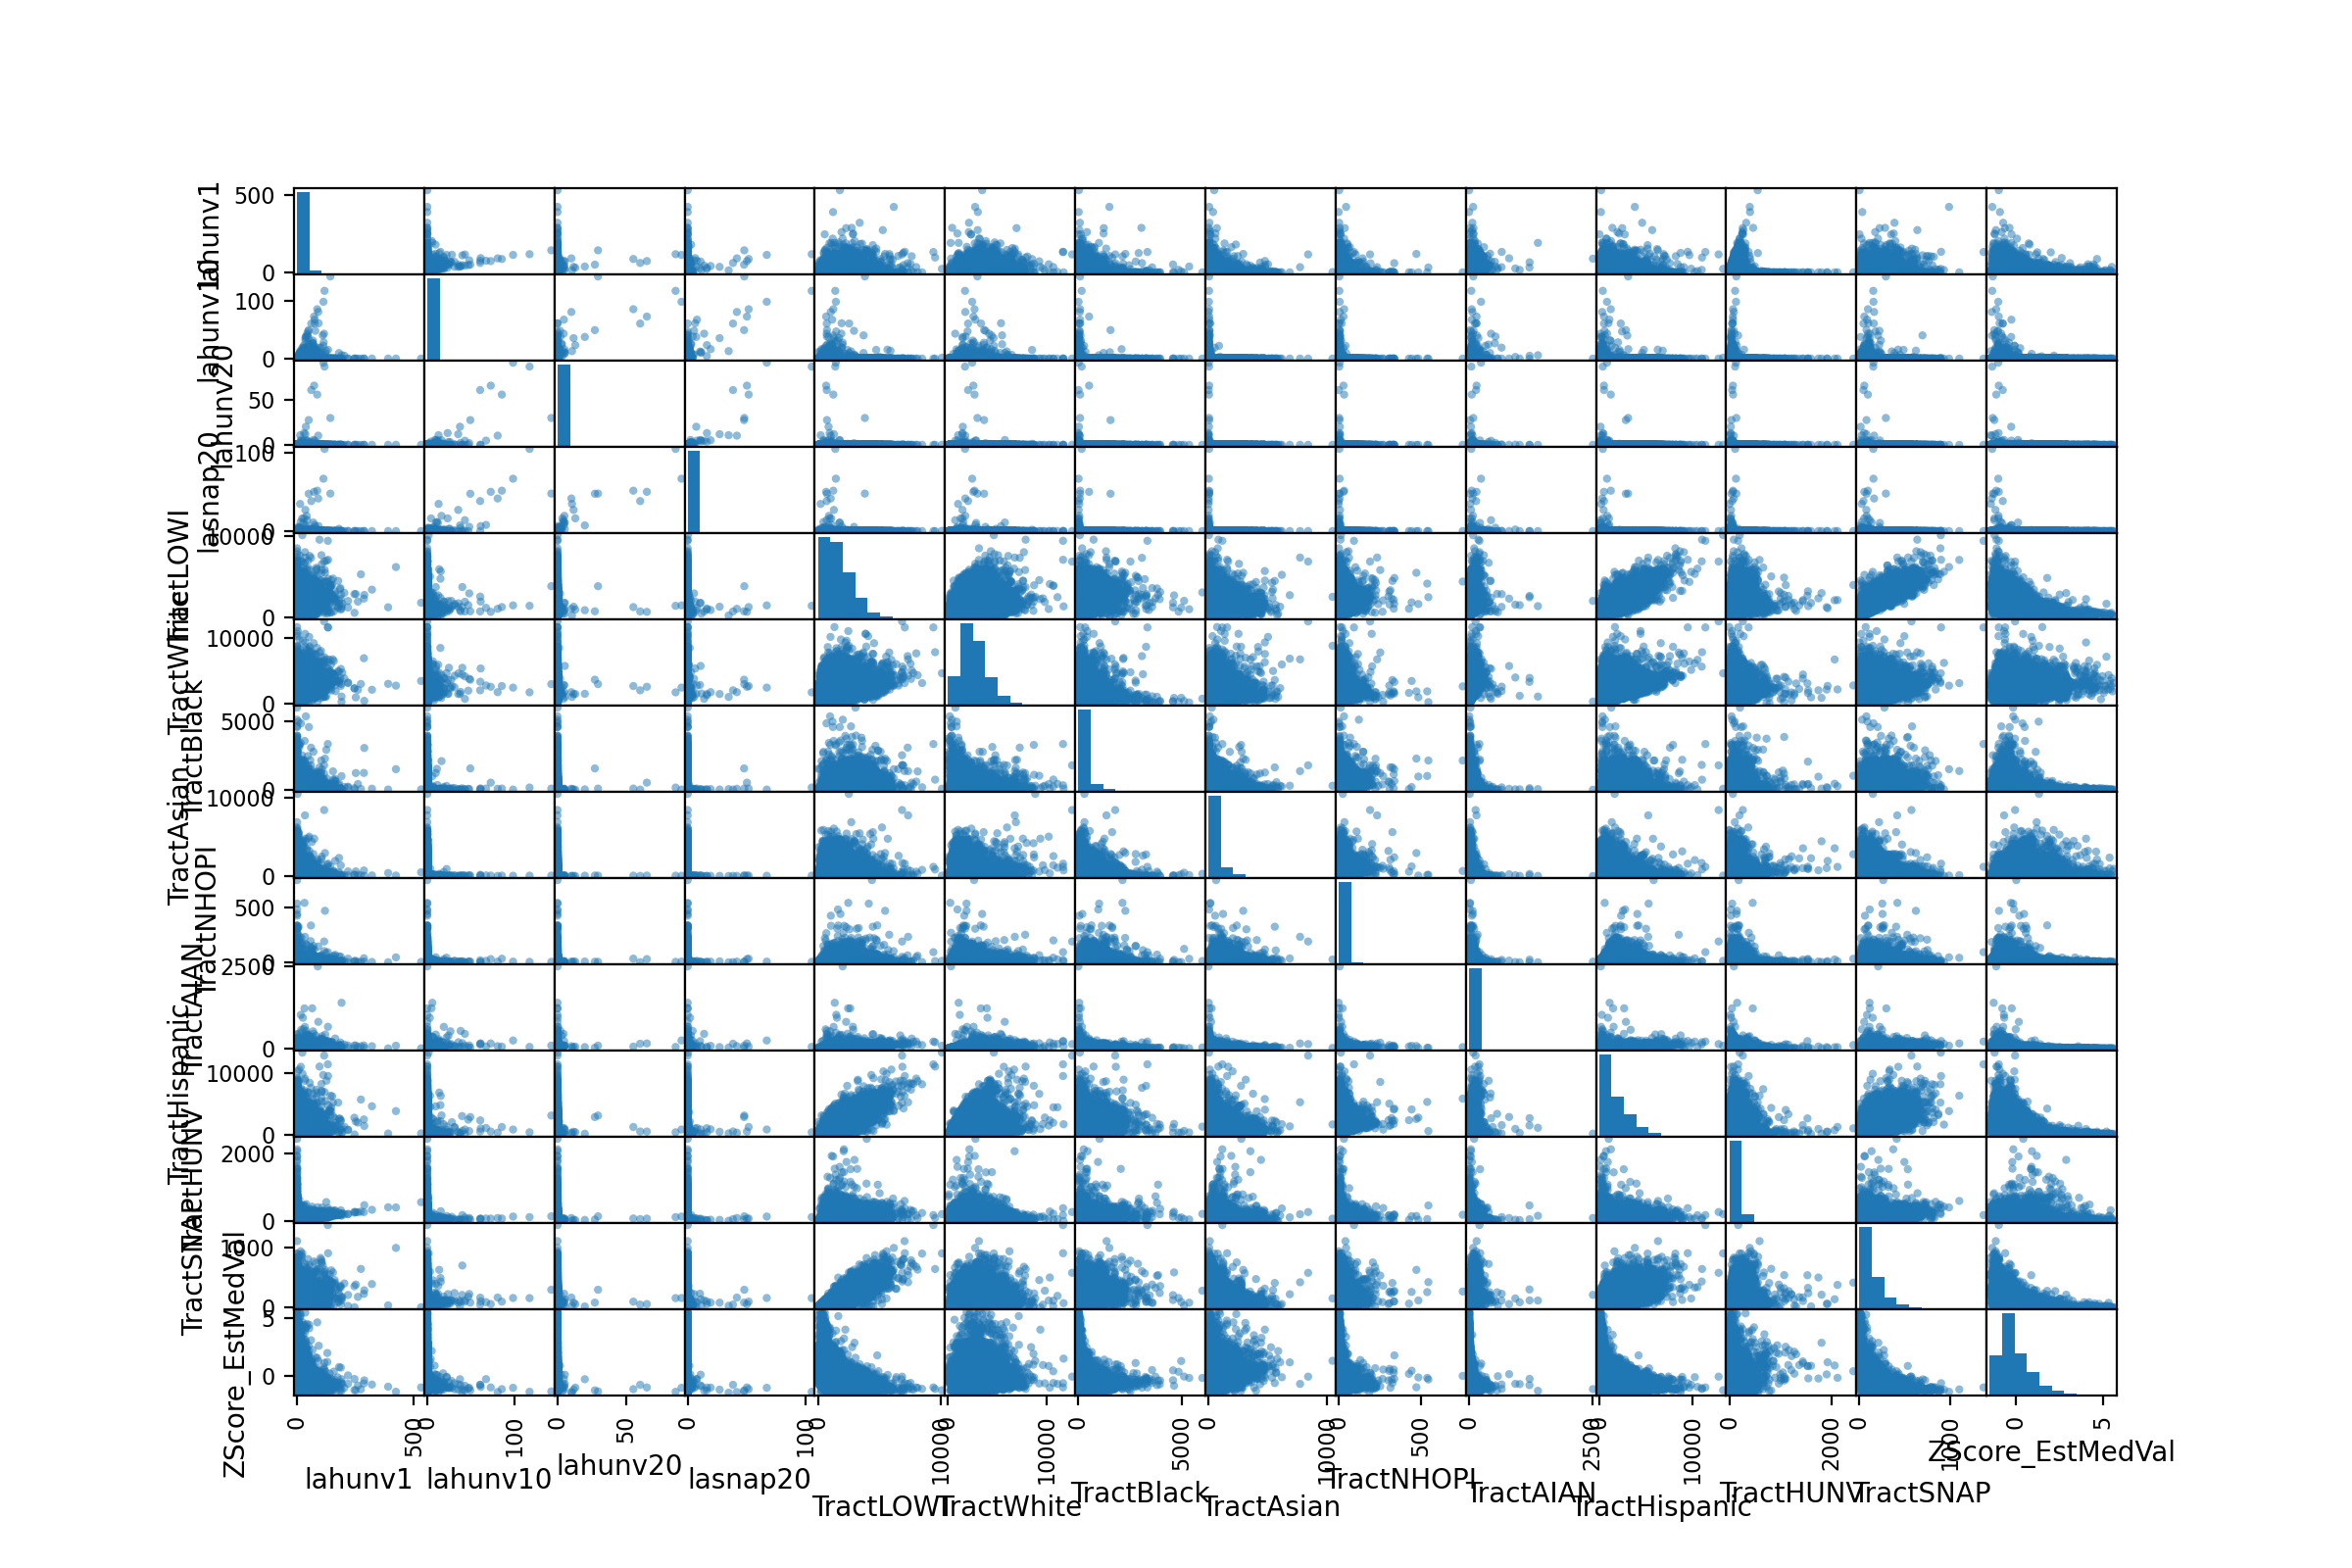

array([[<AxesSubplot:xlabel='lahunv1', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='lahunv10', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='lahunv20', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='lasnap20', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractLOWI', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractWhite', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractBlack', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractAsian', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractNHOPI', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractAIAN', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractHispanic', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractHUNV', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractSNAP', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='lahunv1'>],
       [<AxesSubplot:xlabel='lahunv1', ylabel='lahunv10'>,
        <AxesSubplot:xlabel='lahunv10', ylabel='lahunv10'>,
        <AxesSubplot:xlabel='l

In [9]:
colist=new_foodAccess_df.filter(['lahunv1','lahunv10',  'lahunv20', 'lasnap20', 'TractLOWI', 
        'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(new_foodAccess_df[attributes], figsize=(12, 8))

In [10]:
#Method2 Machine learning: linear regression
##create variables
X=new_foodAccess_df.drop(columns=["ZScore_EstMedVal"], axis=1)
X

Urban  POP2010  OHU2010  NUMGQTRS  LILATracts_halfAnd10  \
0         1     2937     1314         2                     0   
1         1     1974      856        70                     0   
2         1     4865     2418        40                     0   
3         1     3703     1779        33                     0   
4         1     3517     1578       126                     0   
...     ...      ...      ...       ...                   ...   
7768      0    10879     3320         6                     0   
7769      0     4233     1492         4                     0   
7770      0     2783      968        12                     0   
7771      0     7357     2802         0                     0   
7772      0     4941     2105         5                     0   

      LILATracts_Vehicle  LowIncomeTracts  PovertyRate  MedianFamilyIncome  \
0                      0                0          5.0              230139   
1                      0                0          4.0              181016   
2                      0                0          8.6              136250   
3                      0                0          7.2              109861   
4                      0                0         15.1              102083   
...                  ...              ...          ...                 ...   
7768                   0                0          7.9               66913   
7769                   0                0         17.6               66416   
7770                   0                0         17.7               57237   
7771                   0                0         11.6               73351   
7772                   0                1         25.1               48423   

      LATracts_half  ...  lasnap20  TractLOWI  TractWhite  TractBlack  \
0                 1  ...       0.0        173        2161         142   
1                 0  ...       0.0        161        1659          33   
2                 0  ...       0.0        781        3468         518   
3                 0  ...       0.0        672        2628         456   
4                 1  ...       0.0        924        1905         955   
...             ...  ...       ...        ...         ...         ...   
7768              0  ...       0.0       3749        7103         565   
7769              0  ...       0.0       1285        3289          44   
7770              0  ...       0.0       1421        1997          31   
7771              0  ...       0.0       1889        6179          57   
7772              0  ...       0.0       2064        4287          30   

      TractAsian  TractNHOPI  TractAIAN  TractHispanic  TractHUNV  TractSNAP  
0            456           9          4            117          0          0  
1            147           0          4            151         57          6  
2            423           5         17            399        354         34  
3            278           6         14            332        159          9  
4            209           5         27            340        258         72  
...          ...         ...        ...            ...        ...        ...  
7768         856         103        157           2759        124         81  
7769         213           5         77            713        118        227  
7770         297           2         75            476         41        140  
7771         181           9        156            916         56        261  
7772          59          13        189            314         17        155  

[7773 rows x 35 columns]

In [11]:
y=new_foodAccess_df["ZScore_EstMedVal"]
y

0       2.416889
1       1.682202
2       1.541934
3       1.400941
4       0.652844
          ...   
7768   -0.856036
7769   -0.910041
7770   -0.842263
7771   -0.553752
7772   -0.955347
Name: ZScore_EstMedVal, Length: 7773, dtype: float64

In [12]:
X.describe()

Urban       POP2010      OHU2010     NUMGQTRS  \
count  7773.000000   7773.000000  7773.000000  7773.000000   
mean      0.916120   4685.479866  1587.826836    75.423517   
std       0.277226   1905.032959   658.272532   339.804011   
min       0.000000     71.000000    13.000000     0.000000   
25%       1.000000   3407.000000  1124.000000     1.000000   
50%       1.000000   4450.000000  1492.000000    12.000000   
75%       1.000000   5682.000000  1957.000000    49.000000   
max       1.000000  28960.000000  8382.000000  8524.000000   

       LILATracts_halfAnd10  LILATracts_Vehicle  LowIncomeTracts  PovertyRate  \
count           7773.000000         7773.000000      7773.000000  7773.000000   
mean               0.274797            0.076418         0.437540    16.371800   
std                0.446441            0.265683         0.496115    11.605238   
min                0.000000            0.000000         0.000000     0.000000   
25%                0.000000            0.000000         0.000000     7.300000   
50%                0.000000            0.000000         0.000000    13.400000   
75%                1.000000            0.000000         1.000000    23.100000   
max                1.000000            1.000000         1.000000    82.700000   

       MedianFamilyIncome  LATracts_half  ...     lasnap20     TractLOWI  \
count         7773.000000    7773.000000  ...  7773.000000   7773.000000   
mean         75744.695742       0.695098  ...     0.091715   1709.046186   
std          37474.746613       0.460395  ...     2.037351   1201.752601   
min           2500.000000       0.000000  ...     0.000000      0.000000   
25%          46921.000000       0.000000  ...     0.000000    779.000000   
50%          68393.000000       1.000000  ...     0.000000   1438.000000   
75%          97188.000000       1.000000  ...     0.000000   2378.000000   
max         250000.000000       1.000000  ...   105.118372  10068.000000   

         TractWhite   TractBlack    TractAsian   TractNHOPI    TractAIAN  \
count   7773.000000  7773.000000   7773.000000  7773.000000  7773.000000   
mean    2700.815129   283.323813    612.251126    18.228355    45.747845   
std     1385.231841   445.507347    814.950080    31.586641    60.092858   
min       43.000000     0.000000      0.000000     0.000000     0.000000   
25%     1699.000000    53.000000    124.000000     4.000000    19.000000   
50%     2498.000000   123.000000    316.000000     9.000000    34.000000   
75%     3454.000000   307.000000    739.000000    21.000000    57.000000   
max    12514.000000  5971.000000  10485.000000   755.000000  2506.000000   

       TractHispanic    TractHUNV    TractSNAP  
count    7773.000000  7773.000000  7773.000000  
mean     1768.612762   120.337450   139.239676  
std      1540.809106   144.748427   139.256280  
min         6.000000     0.000000     0.000000  
25%       575.000000    37.000000    37.000000  
50%      1293.000000    80.000000    98.000000  
75%      2568.000000   156.000000   197.000000  
max     13341.000000  2428.000000  1368.000000  

[8 rows x 35 columns]

In [13]:
X.dtypes

Urban                     int64
POP2010                   int64
OHU2010                   int64
NUMGQTRS                  int64
LILATracts_halfAnd10      int64
LILATracts_Vehicle        int64
LowIncomeTracts           int64
PovertyRate             float64
MedianFamilyIncome        int64
LATracts_half             int64
LATracts1                 int64
LATracts10                int64
LAPOP05_10              float64
lawhitehalf             float64
lablackhalf             float64
laasianhalf             float64
laomultirhalf           float64
lawhite1                float64
lanhopi1                float64
laaian1                 float64
lahisp1                 float64
lahunv1                 float64
lahunv10                float64
laasian20               float64
lahunv20                float64
lasnap20                float64
TractLOWI                 int64
TractWhite                int64
TractBlack                int64
TractAsian                int64
TractNHOPI                int64
TractAIA

In [14]:
#continous variabel scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_continous=X.filter(['POP2010', 'OHU2010','NUMGQTRS','PovertyRate', 'MedianFamilyIncome','LAPOP05_10', 'lawhitehalf', 'lablackhalf', 'laasianhalf', 'laomultirhalf', 'lawhite1',  'lanhopi1', 
        'laaian1',  'lahisp1', 'laasian20','lahunv1','lahunv10',  'lahunv20', 'lasnap20', 'TractLOWI', 
        'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 
       'TractHispanic', 'TractHUNV', 'TractSNAP'], axis=1)

X[X_continous.columns] = sc.fit_transform(X_continous)
X



Urban   POP2010   OHU2010  NUMGQTRS  LILATracts_halfAnd10  \
0         1 -0.917880 -0.416005 -0.216090                     0   
1         1 -1.423416 -1.111810 -0.015962                     0   
2         1  0.094241  1.261220 -0.104254                     0   
3         1 -0.515762  0.290435 -0.124855                     0   
4         1 -0.613404 -0.014929  0.148850                     0   
...     ...       ...       ...       ...                   ...   
7768      0  3.251345  2.631561 -0.204318                     0   
7769      0 -0.237533 -0.145583 -0.210204                     0   
7770      0 -0.998724 -0.941657 -0.186659                     0   
7771      0  1.402439  1.844603 -0.221976                     0   
7772      0  0.134138  0.785703 -0.207261                     0   

      LILATracts_Vehicle  LowIncomeTracts  PovertyRate  MedianFamilyIncome  \
0                      0                0    -0.979948            4.120221   
1                      0                0    -1.066122            2.809307   
2                      0                0    -0.669723            1.614666   
3                      0                0    -0.790366            0.910440   
4                      0                0    -0.109595            0.702873   
...                  ...              ...          ...                 ...   
7768                   0                0    -0.730045           -0.235686   
7769                   0                0     0.105838           -0.248949   
7770                   0                0     0.114456           -0.493903   
7771                   0                0    -0.411203           -0.063879   
7772                   0                1     0.752140           -0.729116   

      LATracts_half  ...  lasnap20  TractLOWI  TractWhite  TractBlack  \
0                 1  ...  -0.04502  -1.278254   -0.389718   -0.317240   
1                 0  ...  -0.04502  -1.288240   -0.752136   -0.561921   
2                 0  ...  -0.04502  -0.772294    0.553867    0.526796   
3                 0  ...  -0.04502  -0.863000   -0.052569    0.387619   
4                 1  ...  -0.04502  -0.653293   -0.574537    1.507763   
...             ...  ...       ...        ...         ...         ...   
7768              0  ...  -0.04502   1.697592    3.178145    0.632300   
7769              0  ...  -0.04502  -0.352879    0.424638   -0.537228   
7770              0  ...  -0.04502  -0.239704   -0.508117   -0.566411   
7771              0  ...  -0.04502   0.149752    2.511066   -0.508046   
7772              0  ...  -0.04502   0.295382    1.145142   -0.568655   

      TractAsian  TractNHOPI  TractAIAN  TractHispanic  TractHUNV  TractSNAP  
0      -0.191743   -0.292179  -0.694767      -1.071982  -0.831409  -0.999945  
1      -0.570932   -0.577128  -0.694767      -1.049914  -0.437597  -0.956856  
2      -0.232239   -0.418823  -0.478421      -0.888949   1.614370  -0.755775  
3      -0.410176   -0.387162  -0.528347      -0.932436   0.267119  -0.935312  
4      -0.494849   -0.418823  -0.312001      -0.927243   0.951108  -0.482879  
...          ...         ...        ...            ...        ...        ...  
7768    0.299116    2.683954   1.851456       0.642812   0.025304  -0.418246  
7769   -0.489940   -0.418823   0.520098      -0.685147  -0.016149   0.630248  
7770   -0.386860   -0.513806   0.486814      -0.838972  -0.548141   0.005460  
7771   -0.529209   -0.292179   1.834815      -0.553390  -0.444506   0.874418  
7772   -0.678921   -0.165535   2.384000      -0.944118  -0.713957   0.113182  

[7773 rows x 35 columns]

In [15]:

# Fit and transform the get.dummies using the categorical variable list
X=pd.get_dummies(X, columns=["Urban","LILATracts_halfAnd10","LILATracts_Vehicle","LowIncomeTracts","LATracts_half",'LATracts1', 'LATracts10'])
X

POP2010   OHU2010  NUMGQTRS  PovertyRate  MedianFamilyIncome  \
0    -0.917880 -0.416005 -0.216090    -0.979948            4.120221   
1    -1.423416 -1.111810 -0.015962    -1.066122            2.809307   
2     0.094241  1.261220 -0.104254    -0.669723            1.614666   
3    -0.515762  0.290435 -0.124855    -0.790366            0.910440   
4    -0.613404 -0.014929  0.148850    -0.109595            0.702873   
...        ...       ...       ...          ...                 ...   
7768  3.251345  2.631561 -0.204318    -0.730045           -0.235686   
7769 -0.237533 -0.145583 -0.210204     0.105838           -0.248949   
7770 -0.998724 -0.941657 -0.186659     0.114456           -0.493903   
7771  1.402439  1.844603 -0.221976    -0.411203           -0.063879   
7772  0.134138  0.785703 -0.207261     0.752140           -0.729116   

      LAPOP05_10  lawhitehalf  lablackhalf  laasianhalf  laomultirhalf  ...  \
0       0.373235     0.443603     0.007481     0.333108      -0.524021  ...   
1      -1.023145    -1.048588    -0.450890    -0.558105      -0.804520  ...   
2      -0.853095    -0.972393     0.180179    -0.525525      -0.755551  ...   
3      -0.984688    -1.008803    -0.409260    -0.549860      -0.796184  ...   
4      -0.594823    -0.749414     0.525540    -0.479063      -0.607731  ...   
...          ...          ...          ...          ...            ...  ...   
7768   -1.023145     3.930777     1.388293     1.127462       2.795007  ...   
7769   -1.023145     0.387871    -0.324600    -0.211712      -0.184601  ...   
7770   -1.023145     0.351354    -0.349979     0.026724      -0.149905  ...   
7771   -1.023145     3.193930    -0.275541    -0.211961       0.517847  ...   
7772   -0.976104     1.781723    -0.357157    -0.446745      -0.214632  ...   

      LILATracts_Vehicle_0  LILATracts_Vehicle_1  LowIncomeTracts_0  \
0                        1                     0                  1   
1                        1                     0                  1   
2                        1                     0                  1   
3                        1                     0                  1   
4                        1                     0                  1   
...                    ...                   ...                ...   
7768                     1                     0                  1   
7769                     1                     0                  1   
7770                     1                     0                  1   
7771                     1                     0                  1   
7772                     1                     0                  0   

      LowIncomeTracts_1  LATracts_half_0  LATracts_half_1  LATracts1_0  \
0                     0                0                1            0   
1                     0                1                0            1   
2                     0                1                0            1   
3                     0                1                0            1   
4                     0                0                1            1   
...                 ...              ...              ...          ...   
7768                  0                1                0            1   
7769                  0                1                0            1   
7770                  0                1                0            1   
7771                  0                1                0            1   
7772                  1                1                0            1   

      LATracts1_1  LATracts10_0  LATracts10_1  
0               1             1             0  
1               0             1             0  
2               0             1             0  
3               0             1             0  
4               0             1             0  
...           ...           ...           ...  
7768            0             1             0  
7769            0             1             0  
7770            0             1

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
print(len(X_train), "train +", len(X_test), "test")


6218 train + 1555 test


In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
regressor.score(X_train, y_train)

0.6929110261658207

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
df_lin_reg = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df_lin_reg

Real Values  Predicted Values
74      -0.450092         -0.344619
2289    -0.373252         -0.218617
4885    -0.993767         -0.756321
2976    -0.837913         -0.415482
3798     2.506776          1.499251
...           ...               ...
3413     0.877926          0.386591
1880    -0.720842         -0.883847
2194     0.174047          0.264770
2078     0.594490         -0.262164
5929    -0.484162         -0.436328

[1555 rows x 2 columns]

In [23]:
#Calculating error metric
rmse_linreg = np.sqrt(mean_squared_error(y_test,y_pred))
r2_linreg = r2_score(y_test,y_pred)
print('LinearRegression Based RMSE is  ' + str(rmse_linreg))
print('LinearRegression Based r2 is  ' +str(r2_linreg))

LinearRegression Based RMSE is  0.5521758471091628
LinearRegression Based r2 is  0.6825050347492649


In [24]:
##method3 polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
poly=PolynomialFeatures(2)
X_poly=poly.fit_transform(X)

In [27]:
X_poly.shape

(7773, 946)

In [28]:
pca=PCA(n_components=80, random_state=1000)

In [29]:
X_pca=pca.fit_transform(X_poly)
print(X_pca.shape)
print(type(X_pca))

(7773, 80)
<class 'numpy.ndarray'>


In [30]:
print("explian the variance explained by principal components: ")
pca.explained_variance_ratio_*100

explian the variance explained by principal components: 


array([5.28950374e+01, 1.39852362e+01, 1.19146319e+01, 6.36991123e+00,
       2.32039155e+00, 2.07010917e+00, 1.73579237e+00, 1.19932341e+00,
       7.63224433e-01, 7.48219565e-01, 6.35320351e-01, 4.35781083e-01,
       3.83342936e-01, 3.26097002e-01, 2.91666800e-01, 2.43945756e-01,
       2.16266605e-01, 1.77151578e-01, 1.71587191e-01, 1.58875381e-01,
       1.51547410e-01, 1.48695258e-01, 1.20815312e-01, 1.17035104e-01,
       1.05652747e-01, 9.89823569e-02, 9.63384196e-02, 9.14630521e-02,
       8.53275275e-02, 7.78461794e-02, 7.43809030e-02, 6.60495862e-02,
       6.18041034e-02, 5.97177789e-02, 5.61982546e-02, 5.44374568e-02,
       4.99495030e-02, 4.62447417e-02, 4.32233290e-02, 4.13854990e-02,
       3.98035469e-02, 3.75614970e-02, 3.66629250e-02, 3.63422124e-02,
       3.44654158e-02, 3.34225076e-02, 3.17557109e-02, 3.03422118e-02,
       2.94820155e-02, 2.81002493e-02, 2.70831301e-02, 2.58770186e-02,
       2.51350811e-02, 2.48081989e-02, 2.31103152e-02, 2.23282224e-02,
      

In [31]:
sum(pca.explained_variance_ratio_*100)

99.52878406582477

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2)

In [33]:
lin_regpoly = LinearRegression()
lin_regpoly.fit(X_train, y_train)

LinearRegression()

In [34]:
lin_regpoly.score(X_train, y_train)

0.7103614401088925

In [35]:
lin_regpoly.score(X_test, y_test)

0.6207692148865425

In [36]:
y_pred = lin_regpoly.predict(X_pca)

In [37]:
df_polynom = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df_polynom

Real Values  Predicted Values
0        2.416889          4.148472
1        1.682202          2.691764
2        1.541934          1.670508
3        1.400941          0.924224
4        0.652844          0.487443
...           ...               ...
7768    -0.856036         -0.342009
7769    -0.910041         -0.303824
7770    -0.842263         -0.558301
7771    -0.553752         -0.439318
7772    -0.955347         -0.954109

[7773 rows x 2 columns]

In [38]:
#Calculating error metric
rmse_regpoly = np.sqrt(mean_squared_error(y,y_pred))
r2_regpoly = r2_score(y,y_pred)
print('PolynomialRegression RMSE is  ' + str(rmse_regpoly))
print('PolynomialRegression r2 is  ' +str(r2_regpoly))

PolynomialRegression RMSE is  0.5547507294859536
PolynomialRegression r2 is  0.6922516281348023


In [39]:
#method4:  Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [40]:
y_pred=tree_reg.predict(X)

In [41]:
df_tree = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df_tree

Real Values  Predicted Values
0        2.416889          2.340374
1        1.682202          2.340374
2        1.541934          0.837071
3        1.400941          0.837071
4        0.652844          0.837071
...           ...               ...
7768    -0.856036         -0.531185
7769    -0.910041         -0.531185
7770    -0.842263         -0.531185
7771    -0.553752          0.069658
7772    -0.955347         -0.531185

[7773 rows x 2 columns]

In [42]:
#Calculating error metric
rmse_treereg = np.sqrt(mean_squared_error(y,y_pred))
r2_tree_reg = r2_score(y,y_pred)
print('DecisionTree RMSE is  ' + str(rmse_treereg))
print('Decision Tree r2 is  ' +str(r2_tree_reg))

DecisionTree RMSE is  0.6592225627875407
Decision Tree r2 is  0.565425612711827


In [43]:
#Method5: RandomForest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
# Create a random forest regressor.
rf_model = RandomForestRegressor(n_estimators=128, random_state=78) 

In [46]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [47]:
rf_model.score(X_train, y_train)

0.963909050561281

In [48]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test)
predictions

array([-0.89346452,  0.13179648,  0.15746248, ..., -0.8241516 ,
       -0.00444229, -0.80739677])

In [49]:
rf_model.score(X_test, y_test)

0.7562804885789001

In [50]:
from sklearn import metrics

In [51]:
#Calculating error metric
rmse_forest = np.sqrt(mean_squared_error(y_test,predictions))
r2_forest = r2_score(y_test,predictions)
print('RandomForest RMSE is  ' + str(rmse_forest))
print('RandomForest r2 is  ' +str(r2_forest))

RandomForest RMSE is  0.48722740791803615
RandomForest r2 is  0.7562804885789001


In [52]:
#create dataFrame for comparision of models
com={"Model Name":['Linear Regression','Polynomial Regression', 'Decision Tree', 'Random Forest'],
     "RMSE":[rmse_linreg,rmse_regpoly,rmse_treereg,rmse_forest],
     "RSquare":[r2_linreg,r2_regpoly,r2_tree_reg,r2_forest]
    
}
df_com=pd.DataFrame(com)
df_com


Model Name      RMSE   RSquare
0      Linear Regression  0.552176  0.682505
1  Polynomial Regression  0.554751  0.692252
2          Decision Tree  0.659223  0.565426
3          Random Forest  0.487227  0.756280

In [77]:
#import keras
import tensorflow 

print("Tensorflow: ", tensorflow.__version__)

Tensorflow:  2.5.0


In [78]:
#Nueralnetworkling
import tensorflow as tf
#from keras import Sequential
from tensorflow import keras
#print("keras: ", keras.__version__)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [86]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features=X_train.shape[1]

hidden_nodes_layer1 = number_input_features
hidden_nodes_layer2 = int(hidden_nodes_layer1/2)
hidden_nodes_layer3 = int(hidden_nodes_layer2/2)

nn = tf.keras.models.Sequential()


In [87]:
#first layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features, kernel_initializer='normal',activation="relu"))
#second layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, kernel_initializer='normal',activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, kernel_initializer='normal',activation="relu"))
# Output layer

nn.add(tf.keras.layers.Dense(units=1,  kernel_initializer='normal'))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 42)                1806      
_________________________________________________________________
dense_17 (Dense)             (None, 21)                903       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                220       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 2,940
Trainable params: 2,940
Non-trainable params: 0
_________________________________________________________________


In [88]:
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse"])

In [89]:
tf.keras.metrics

<module 'tensorflow.keras.metrics' from 'C:\\ProgramData\\Anaconda3\\envs\\mlenv\\lib\\site-packages\\tensorflow\\keras\\metrics\\__init__.py'>

In [90]:
X_train

POP2010   OHU2010  NUMGQTRS  PovertyRate  MedianFamilyIncome  \
1000 -1.056995 -0.078737 -0.071880    -0.325029           -0.327407   
6862 -0.323102 -0.286871 -0.101311    -0.816218            0.997250   
1342 -0.335701 -0.428158 -0.042449    -0.256090           -0.389186   
4284 -1.156737 -1.020656 -0.157229    -0.256090            0.563891   
7150  0.004998 -0.207871 -0.157229     0.011047           -0.369144   
...        ...       ...       ...          ...                 ...   
4535  0.190833 -0.112160 -0.216090     0.200629           -0.776111   
2749  0.391368 -0.747196 -0.221976     0.528089           -0.677425   
3161 -0.327826  1.271855 -0.154286     0.769375           -1.074491   
903  -0.523636 -0.221544 -0.157229    -0.350881           -0.520242   
7194 -1.265403 -1.541751  1.952947     0.821079           -0.799408   

      LAPOP05_10  lawhitehalf  lablackhalf  laasianhalf  laomultirhalf  ...  \
1000   -0.322399    -0.174223    -0.278448    -0.482501      -0.618642  ...   
6862    0.424622     0.390533    -0.392285     0.748604      -0.374147  ...   
1342   -1.023145    -1.048588    -0.450890    -0.558105      -0.804520  ...   
4284   -1.023145     0.516796    -0.395552    -0.463587      -0.570852  ...   
7150    0.523532    -0.333305     2.220680     0.292193       0.613972  ...   
...          ...          ...          ...          ...            ...  ...   
4535   -1.023145     0.191093    -0.273110    -0.478668       0.910109  ...   
2749    1.026465     0.110873     0.911370    -0.548484       2.892650  ...   
3161   -1.023145    -1.048588    -0.450890    -0.558105      -0.804520  ...   
903     0.753734     1.182767    -0.353234    -0.510846      -0.330311  ...   
7194    0.072950    -0.339854     1.342720    -0.365131       0.161081  ...   

      LILATracts_Vehicle_0  LILATracts_Vehicle_1  LowIncomeTracts_0  \
1000                     1                     0                  1   
6862                     1                     0                  1   
1342                     1                     0                  1   
4284                     1                     0                  1   
7150                     1                     0                  0   
...                    ...                   ...                ...   
4535                     1                     0                  0   
2749                     1                     0                  0   
3161                     1                     0                  0   
903                      1                     0                  1   
7194                     1                     0                  0   

      LowIncomeTracts_1  LATracts_half_0  LATracts_half_1  LATracts1_0  \
1000                  0                0                1            1   
6862                  0                0                1            1   
1342                  0                1                0            1   
4284                  0                1                0            1   
7150                  1                0                1            1   
...                 ...              ...              ...          ...   
4535                  1                1                0            1   
2749                  1                0                1            1   
3161                  1                1                0            1   
903                   0                0                1            0   
7194                  1                0                1            0   

      LATracts1_1  LATracts10_0  LATracts10_1  
1000            0             1             0  
6862            0             1             0  
1342            0             1             0  
4284            0             1             0  
7150            0             1             0  
...           ...           ...           ...  
4535            0             1             0  
2749            0             1             0  
3161            0             1

In [91]:
nn.fit(X_train, y_train, epochs = 100)

Epoch 1/100
195/195 [==============================] - 0s 950us/step - loss: 0.5772 - mse: 0.5772
Epoch 2/100
195/195 [==============================] - 0s 844us/step - loss: 0.2985 - mse: 0.2985
Epoch 3/100
195/195 [==============================] - 0s 823us/step - loss: 0.2741 - mse: 0.2741
Epoch 4/100
195/195 [==============================] - 0s 831us/step - loss: 0.2629 - mse: 0.2629
Epoch 5/100
195/195 [==============================] - 0s 980us/step - loss: 0.2597 - mse: 0.2597
Epoch 6/100
195/195 [==============================] - 0s 739us/step - loss: 0.2525 - mse: 0.2525
Epoch 7/100
195/195 [==============================] - 0s 855us/step - loss: 0.2503 - mse: 0.2503
Epoch 8/100
195/195 [==============================] - 0s 966us/step - loss: 0.2474 - mse: 0.2474
Epoch 9/100
195/195 [==============================] - 0s 1ms/step - loss: 0.2457 - mse: 0.2457
Epoch 10/100
195/195 [==============================] - 0s 896us/step - loss: 0.2438 - mse: 0.2438
Epoch 11/100
195/195 

Epoch 82/100
195/195 [==============================] - 0s 900us/step - loss: 0.1858 - mse: 0.1858
Epoch 83/100
195/195 [==============================] - 0s 909us/step - loss: 0.1861 - mse: 0.1861
Epoch 84/100
195/195 [==============================] - 0s 1ms/step - loss: 0.1858 - mse: 0.1858
Epoch 85/100
195/195 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.1855
Epoch 86/100
195/195 [==============================] - 0s 1ms/step - loss: 0.1846 - mse: 0.1846
Epoch 87/100
195/195 [==============================] - 0s 1ms/step - loss: 0.1853 - mse: 0.1853
Epoch 88/100
195/195 [==============================] - 0s 1ms/step - loss: 0.1866 - mse: 0.1866
Epoch 89/100
195/195 [==============================] - 0s 1ms/step - loss: 0.1830 - mse: 0.1830
Epoch 90/100
195/195 [==============================] - 0s 1ms/step - loss: 0.1814 - mse: 0.1814
Epoch 91/100
195/195 [==============================] - 0s 855us/step - loss: 0.1821 - mse: 0.1821
Epoch 92/100
195/195 [==

In [92]:
prediction=nn.predict(X_test)

In [95]:
mae_neuro = metrics.mean_absolute_error(y_test, prediction)
mse_neuro = metrics.mean_squared_error(y_test, prediction)
rmse_neuro = np.sqrt(mse) # or mse**(0.5)  
r2_neuro = metrics.r2_score(y_test,prediction)


In [96]:
print(f"MAE :{mae_neuro},  MeanSqureError: {mse_neuro}, RMSE: {rmse_neuro}, R Square:{r2_neuro}")

MAE :0.3588270121923221,  MeanSqureError: 0.284696607145474, RMSE: 0.47971616810438655, R Square:0.7494912714169126


In [97]:
com={"Model Name":['Linear Regression','Polynomial Regression', 'Decision Tree', 'Random Forest', 'NeuralNetworking'],
     "RMSE":[rmse_linreg,rmse_regpoly,rmse_treereg,rmse_forest,rmse_neuro],
     "RSquare":[r2_linreg,r2_regpoly,r2_tree_reg,r2_forest,r2_neuro]
    
}
df_com=pd.DataFrame(com)
df_com

Model Name      RMSE   RSquare
0      Linear Regression  0.552176  0.682505
1  Polynomial Regression  0.554751  0.692252
2          Decision Tree  0.659223  0.565426
3          Random Forest  0.487227  0.756280
4       NeuralNetworking  0.479716  0.749491